# Data analysis for all data collected during our project
 

#### imports and  loading Data 

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from operator import itemgetter

dfMerge16 = pd.read_csv("CleanData/MergeClean-PC16.csv")
dfMerge21 = pd.read_csv("CleanData/MergeClean-PC21.csv")
dfMerge23 = pd.read_csv("CleanData/MergeClean-PC23.csv")
dfMerge6 = pd.read_csv("CleanData/MergeClean-PC6.csv")

dfRead16 = pd.read_csv("CleanData/ReadCSVClean-PC16.csv")
dfRead21 = pd.read_csv("CleanData/ReadCSVClean-PC21.csv")
dfRead23 = pd.read_csv("CleanData/ReadCSVClean-PC23.csv")
dfRead6 = pd.read_csv("CleanData/ReadCSVClean-PC6.csv")

dfMerge16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,2.144348,1.843567,0.133606,209.112,72.0,best,25000
1,2.076294,1.757446,0.127869,241.316,72.0,best,25000
2,2.113647,1.822815,0.119995,212.796,72.0,best,25000
3,2.221313,1.927490,0.131714,214.291,72.0,best,25000
4,2.150085,1.861267,0.121155,212.584,72.0,best,25000


In [62]:
dfRead16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Input case,Size
0,2.240601,1.966187,0.134399,227.880,53.0,random1,25000
1,2.062317,1.775085,0.126160,250.212,53.0,random1,25000
2,2.140869,1.876709,0.121887,222.526,53.0,random1,25000
3,2.217102,1.940735,0.133545,226.620,53.0,random1,25000
4,2.058533,1.796814,0.119385,219.516,53.0,random1,25000


In [63]:
def calcMean(df,type,size):
    meandf = df[df["Input case"] == type][df["Size"]==size].mean()
    meandf["Input case"] = type
    return meandf

def mean_of_dataset(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    l = []
    for case in c:
        for size in s:
            l.append(calcMean(df, case, size))   
    
    dfMeans = pd.concat([series.to_frame().T for series in l], ignore_index=True)
    return dfMeans

dfMergeMean16 = mean_of_dataset(dfMerge16)
dfMergeMean6 = mean_of_dataset(dfMerge6)
dfMergeMean21 = mean_of_dataset(dfMerge21)
dfMergeMean23 = mean_of_dataset(dfMerge23)



dfMergeMean16.head()



C:\Users\langk\AppData\Local\Temp\ipykernel_1896\2587852467.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_1896\2587852467.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_1896\2587852467.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_1896\2587852467.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,2.128873,1.831658,0.127759,217.863777,70.215054,25000.0,best
1,2.644826,2.288658,0.15934,258.011019,71.0,50000.0,best
2,3.270624,2.843299,0.195612,306.176791,72.610465,75000.0,best
3,3.756564,3.266015,0.223806,351.820904,74.0,100000.0,best
4,4.782608,4.160429,0.277676,445.765587,75.437158,200000.0,best


In [64]:

def list_of_case(df):
    l = []
    for i in range(len(df)):
        if df["Input case"].iloc[i] not in l:
            l.append(df["Input case"].iloc[i])
    return l


def mean_of_dataset_readCSV(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = list_of_case(df)
    l = []
    for case in range(len(c)):
        for size in range(len(s)):
            l.append(calcMean(df, c[case], s[size]))  

    dfMeans = pd.concat([series.to_frame().T  for series in l], ignore_index=True)
    return dfMeans

dfReadMean16 = mean_of_dataset_readCSV(dfRead16)
dfReadMean21 = mean_of_dataset_readCSV(dfRead21)
dfReadMean23 = mean_of_dataset_readCSV(dfRead23)
dfReadMean6 = mean_of_dataset_readCSV(dfRead6)

dfReadMean16.head()


C:\Users\langk\AppData\Local\Temp\ipykernel_1896\2587852467.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_1896\2587852467.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_1896\2587852467.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\langk\AppData\Local\Temp\ipykernel_1896\2587852467.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,2.149151,1.873956,0.12836,231.807079,53.973684,25000.0,random1
1,2.519434,2.185134,0.150334,264.781167,57.0,50000.0,random1
2,3.059938,2.668515,0.178193,304.554189,61.0,75000.0,random1
3,3.524851,3.07726,0.205626,343.570833,63.527778,100000.0,random1
4,4.166064,3.626851,0.233299,420.754475,65.425,200000.0,random1


In [65]:
dfMergeMean16 = dfMergeMean16.reset_index(drop=True)
dfReadMean16 = dfReadMean16.reset_index(drop=True)

dfMergeMean6 = dfMergeMean6.reset_index(drop=True)
dfReadMean6 = dfReadMean6.reset_index(drop=True)

dfMergeMean21 = dfMergeMean21.reset_index(drop=True)
dfReadMean21 = dfReadMean21.reset_index(drop=True)

dfMergeMean23 = dfMergeMean23.reset_index(drop=True)
dfReadMean23 = dfReadMean23.reset_index(drop=True)

dfMergeMean16.head()

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case
0,2.128873,1.831658,0.127759,217.863777,70.215054,25000.0,best
1,2.644826,2.288658,0.15934,258.011019,71.0,50000.0,best
2,3.270624,2.843299,0.195612,306.176791,72.610465,75000.0,best
3,3.756564,3.266015,0.223806,351.820904,74.0,100000.0,best
4,4.782608,4.160429,0.277676,445.765587,75.437158,200000.0,best


In [66]:
def deductReadFromAlg(meanC, meanR):
    lc = []
    lt = []
    lm = []

    for i in range(len(meanC["Size"])):
        case = meanC["Input case"][i]
        size = meanC["Size"][i]
        if case == "best":
                case2 = "sorted"
        if case == "worst":
            case2 = "mergeworst"
        if case.startswith("random"):
            case2 = "random"+case.split("m")[-1]

        Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
        Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
        lc.append(Cc-Rc)

        Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
        Rt = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"].index.tolist()[0]]
        lt.append(Ct-Rt)

        Cm = meanC[meanC["Input case"] == case][meanC["Size"]==size]["DRAM (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        Rm = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["DRAM (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["DRAM (J)"].index.tolist()[0]]
        lm.append(Cm-Rm)

    meanC["CPU - readCSV"] = lc
    meanC["Time - readCSV"] = lt
    meanC["Memory - readCSV"] = lm


deductReadFromAlg(dfMergeMean16,dfReadMean16)
deductReadFromAlg(dfMergeMean6,dfReadMean6)
deductReadFromAlg(dfMergeMean21,dfReadMean21)
deductReadFromAlg(dfMergeMean23,dfReadMean23)



C:\Users\langk\AppData\Local\Temp\ipykernel_1896\3588678830.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_1896\3588678830.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_1896\3588678830.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
C:\Users\langk\AppData\Local\Temp\ipykernel_1896\3588678830.py:21: UserWarning: Boole

# PLOTS

In [67]:
# For bubblesort: polynomial regression
def polyReg(SeriesX, SeriesY,dg, Label, color, plotLabel = True, regLine=True, printR2Score = True, plotGraph = True, dots="o"):
    X = SeriesX.values.reshape(SeriesX.size, -1)
    y = SeriesY.values

    fitness = []
   #for dg in range(minDegrees, maxDegrees):
    # Create an empty polynomial function with degree of 4
    poly_reg = PolynomialFeatures(degree=dg)
    
    # Fit the function to the X and transform X to the polynomial format
    X_poly = poly_reg.fit_transform(X)

    # Now we construct a Multiple Linear Regressor on the transformed X_ploy
    lr_2 = LinearRegression()  
    lr_2.fit(X_poly, y)  
    
    # Get the y values using the constructed Multiple Linear Regressor
    y_poly = lr_2.predict(X_poly)
    
    r2 = metrics.r2_score(y,y_poly)
    #if printR2Score:
    #    print(f"r2_score for {Label} {dg} is: {r2}")
    fitness.append((f"poly {dg}dg", r2, y_poly))
    #print(f"Parameters of poly: {poly_reg.get_params()}") #does not give what we are looking for
    
    if plotGraph:
        plt.plot(X, y,dots, color=color,markersize=10)
        if r2 > 0.5 and regLine:
            plt.plot(X, y_poly, color=color, linewidth=2)
        #plt.legend(loc='upper left')
    #print(lr_2.intercept_, lr_2.coef_)
    return max(fitness,key=itemgetter(1))

In [68]:
def getIndex(df,case,size):
    return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]


In [69]:
import math
def calcPercent(df):
    cpuPercent = []
    pkgPercent = []
    fullEC = []
    nlogn = []
    for case in ["best", "worst", "random"]:
        if case != "random":
            for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                cpuPercent.append(df["CPU (J)"][getIndex(df,case,size)] / df["PKG (J)"][getIndex(df,case,size)] * 100)
                pkgPercent.append(100)
                fullEC.append(df["CPU - readCSV"][getIndex(df,case,size)]+df["Memory - readCSV"][getIndex(df,case,size)])
                nlogn.append(df["Size"][getIndex(df,case,size)] * math.log2(df["Size"][getIndex(df,case,size)]))
        else :
            for i in range(1,11):
                for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                    cpuPercent.append(df["CPU (J)"][getIndex(df,case+str(i),size)] / df["PKG (J)"][getIndex(df,case+str(i),size)] * 100)
                    pkgPercent.append(100)
                    fullEC.append(df["CPU - readCSV"][getIndex(df,case+str(i),size)]+df["Memory - readCSV"][getIndex(df,case+str(i),size)])
                    nlogn.append(df["Size"][getIndex(df,case+str(i),size)] * math.log2(df["Size"][getIndex(df,case+str(i),size)]))

    df["CPU % of PKG"] = cpuPercent
    df["PKG %"] = pkgPercent
    df["full EC"] = fullEC
    df["nlog(n)"] = nlogn
calcPercent(dfMergeMean16)
calcPercent(dfMergeMean6)
calcPercent(dfMergeMean21)
calcPercent(dfMergeMean23)

dfMergeMean16.head()

C:\Users\langk\AppData\Local\Temp\ipykernel_1896\2168887079.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]
C:\Users\langk\AppData\Local\Temp\ipykernel_1896\2168887079.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]
C:\Users\langk\AppData\Local\Temp\ipykernel_1896\2168887079.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]
C:\Users\langk\AppData\Local\Temp\ipykernel_1896\2168887079.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]


,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC,nlog(n)
0,2.128873,1.831658,0.127759,217.863777,70.215054,25000.0,best,0.146680,10.618393,0.013745,86.038866,100,0.160425,3.652410e+05
1,2.644826,2.288658,0.15934,258.011019,71.0,50000.0,best,0.154439,11.885300,0.017204,86.533398,100,0.171643,7.804820e+05
2,3.270624,2.843299,0.195612,306.176791,72.610465,75000.0,best,0.287986,21.545305,0.024774,86.934434,100,0.312760,1.214595e+06
3,3.756564,3.266015,0.223806,351.820904,74.0,100000.0,best,0.400496,37.575446,0.035085,86.941551,100,0.435581,1.660964e+06
4,4.782608,4.160429,0.277676,445.765587,75.437158,200000.0,best,0.520229,48.393542,0.050509,86.990807,100,0.570738,3.521928e+06


In [113]:
dfMergeMean6[dfMergeMean6["Temp (C)"] > 84]

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC,nlog(n)
2,3.09862,2.730376,0.186737,300.647624,84.716292,75000.0,best,0.260826,21.259816,0.01584,88.115876,100,0.276666,1.214595e+06


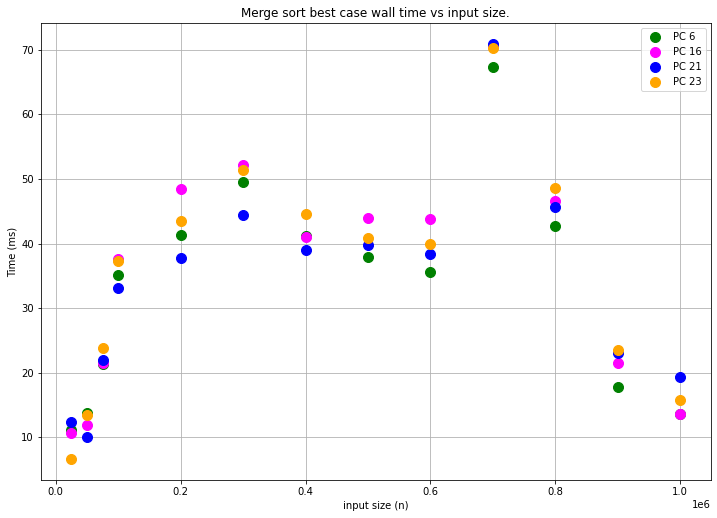

In [97]:
plt.figure(figsize=(10*1.2,7*1.2))

plt.plot(dfMergeMean6[dfMergeMean6["Input case"] == "best"]["Size"], dfMergeMean6[dfMergeMean6["Input case"] == "best"]["Time - readCSV"],"o", color="green",markersize=10, label="PC 6")
plt.plot(dfMergeMean16[dfMergeMean16["Input case"] == "best"]["Size"], dfMergeMean16[dfMergeMean16["Input case"] == "best"]["Time - readCSV"],"o", color="fuchsia",markersize=10, label="PC 16")
plt.plot(dfMergeMean21[dfMergeMean21["Input case"] == "best"]["Size"], dfMergeMean21[dfMergeMean21["Input case"] == "best"]["Time - readCSV"],"o", color="blue",markersize=10, label="PC 21")
plt.plot(dfMergeMean23[dfMergeMean23["Input case"] == "best"]["Size"], dfMergeMean23[dfMergeMean23["Input case"] == "best"]["Time - readCSV"],"o", color="orange",markersize=10, label="PC 23")

plt.title("Merge sort best case wall time vs input size.")
plt.xlabel("input size (n)")
plt.ylabel("Time (ms)")
# plt.xlim(0, 150000)
# plt.ylim(0,40)
plt.grid()
plt.legend()
plt.show()


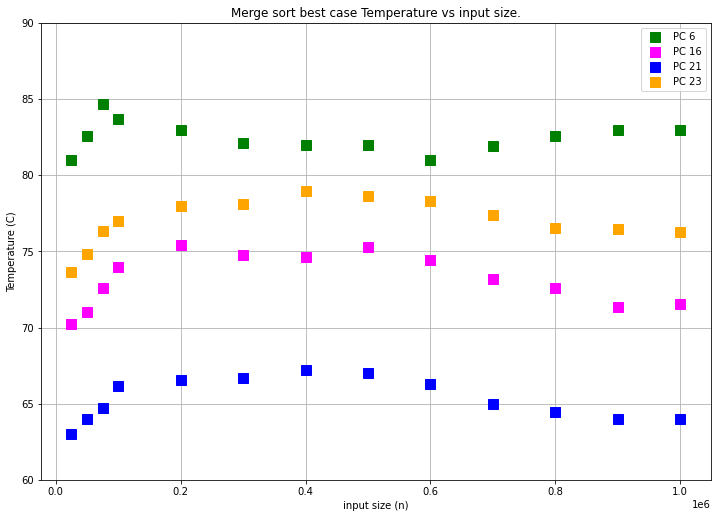

In [93]:
plt.figure(figsize=(10*1.2,7*1.2))

plt.plot(dfMergeMean6[dfMergeMean6["Input case"] == "best"]["Size"], dfMergeMean6[dfMergeMean6["Input case"] == "best"]["Temp (C)"],"s", color="green",markersize=10, label="PC 6")
plt.plot(dfMergeMean16[dfMergeMean16["Input case"] == "best"]["Size"], dfMergeMean16[dfMergeMean16["Input case"] == "best"]["Temp (C)"],"s", color="fuchsia",markersize=10, label="PC 16")
plt.plot(dfMergeMean21[dfMergeMean21["Input case"] == "best"]["Size"], dfMergeMean21[dfMergeMean21["Input case"] == "best"]["Temp (C)"],"s", color="blue",markersize=10, label="PC 21")
plt.plot(dfMergeMean23[dfMergeMean23["Input case"] == "best"]["Size"], dfMergeMean23[dfMergeMean23["Input case"] == "best"]["Temp (C)"],"s", color="orange",markersize=10, label="PC 23")


plt.title("Merge sort best case Temperature vs input size.")
plt.xlabel("input size (n)")
plt.ylabel("Temperature (C)")
plt.ylim(60, 90)
plt.grid()
plt.legend()
plt.show()


In [74]:
dfMergeMean6[dfMergeMean6["Temp (C)"] > 84]

,PKG (J),CPU (J),DRAM (J),Time (ms),Temp (C),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC,nlog(n)
2,3.09862,2.730376,0.186737,300.647624,84.716292,75000.0,best,0.260826,21.259816,0.01584,88.115876,100,0.276666,1.214595e+06


random0 R2 0.931732349379819  

random1 R2 0.9137708566772146  

random2 R2 0.966458846235907  

random3 R2 0.9162738139139953  

random4 R2 0.915207798954357  

random5 R2 0.9589349014307835  

random6 R2 0.9372878430540362  

random7 R2 0.9219508817178989  

random8 R2 0.9121667935919204  

random9 R2 0.9259117861140711  



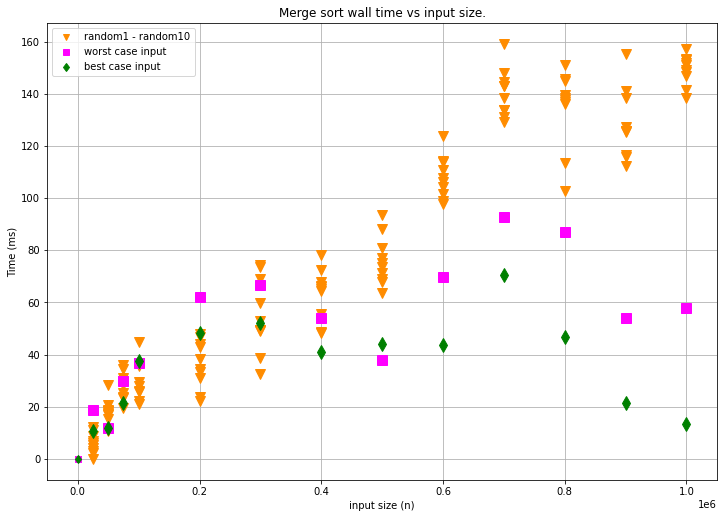

In [75]:
plt.figure(figsize=(10*1.2,7*1.2))
color = "red"

Rs = []

for i in range(1,11):
    Rs.append(polyReg(dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["Size"], dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v",regLine=False))
plt.plot(0,0,"v", color="darkorange",label="random1 - random10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["Size"], dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
plt.plot(0,0,"s", color="fuchsia",label="worst case input")
best = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "best"]["Size"], dfMergeMean16[dfMergeMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d",regLine=False)
plt.plot(0,0,"d", color="green",label="best case input")
# print(f"worst R2 ", worst[1], "\n")
#print(f"best R2 ", best[1], "\n")
plt.title("Merge sort wall time vs input size.")
plt.xlabel("input size (n)")
plt.ylabel("Time (ms)")
plt.grid()
plt.legend()
plt.show()


# Time v big-o

random0 R2 0.931140036097873  

random1 R2 0.9087960757435455  

random2 R2 0.9650712469902213  

random3 R2 0.9125262206060775  

random4 R2 0.9104212069107703  

random5 R2 0.9581410180970628  

random6 R2 0.9339580811756889  

random7 R2 0.9210237662849303  

random8 R2 0.9087537087427218  

random9 R2 0.9212513976034007  

worst R2  0.4377610358227014 

best R2  0.03031669853174379 



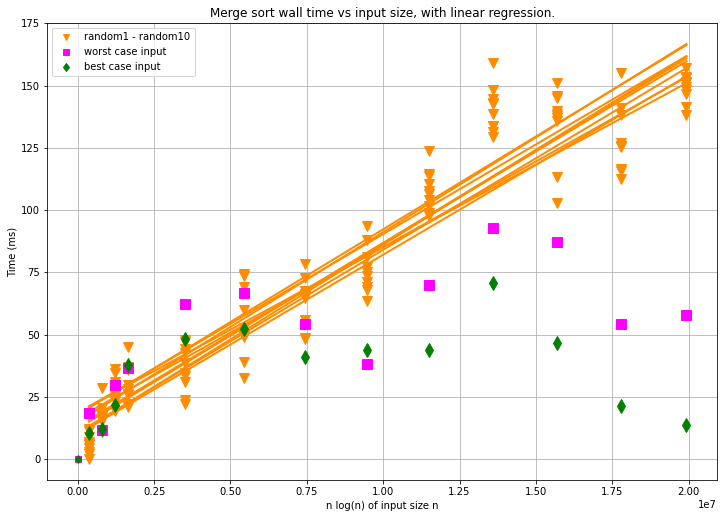

In [76]:
plt.figure(figsize=(10*1.2,7*1.2))
color = "red"

Rs = []

for i in range(1,11):
    Rs.append(polyReg(dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["nlog(n)"], dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "darkorange",dots="v"))
plt.plot(0,0,"v", color="darkorange",label="random1 - random10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["nlog(n)"], dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
plt.plot(0,0,"s", color="fuchsia",label="worst case input")
best = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "best"]["nlog(n)"], dfMergeMean16[dfMergeMean16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green",dots="d",regLine=False)
plt.plot(0,0,"d", color="green",label="best case input")
print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Merge sort wall time vs input size, with linear regression.")
plt.xlabel("n log(n) of input size n")
plt.ylabel("Time (ms)")
plt.grid()
plt.legend()
plt.show()


# EC v Time

random0 R2 0.8675204228459317  

random1 R2 0.850321207331968  

random2 R2 0.8734403295472177  

random3 R2 0.8289945917747209  

random4 R2 0.88740748827591  

random5 R2 0.9156898400952599  

random6 R2 0.870251964829105  

random7 R2 0.9103477874812894  

random8 R2 0.9251896939390128  

random9 R2 0.9087064767281736  

worst R2  0.6690725940949567 

best R2  0.8245912913138103 



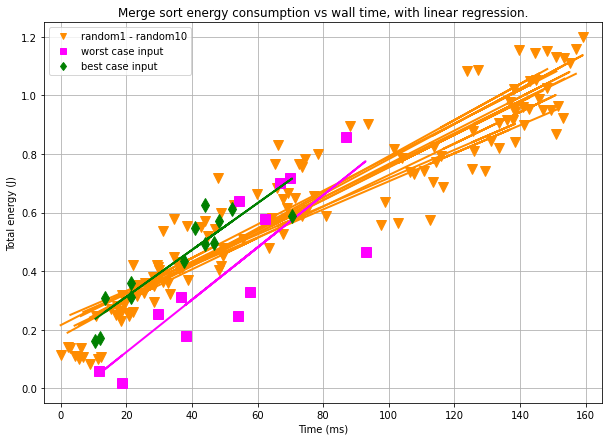

In [105]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

for i in range(1,11):
    Rs.append(polyReg(dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "darkorange",dots="v"))
plt.plot(-100,0,"v", color="darkorange",label="random1 - random10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["Time - readCSV"], dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(-100,0,"s", color="fuchsia",label="worst case input")
print(f"worst R2 ", worst[1], "\n")
best = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "best"]["Time - readCSV"], dfMergeMean16[dfMergeMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d")
plt.plot(-100,0,"d", color="green",label="best case input")
print(f"best R2 ", best[1], "\n")
plt.title("Merge sort energy consumption vs wall time, with linear regression.")
plt.ylabel("Total energy (J)")
plt.xlabel("Time (ms)")
plt.xlim(-5, 165)
plt.ylim(-0.05, 1.25)
plt.legend()
plt.grid()
plt.show()


worst R2  0.6690725940949567 

best R2  0.8245912913138103 



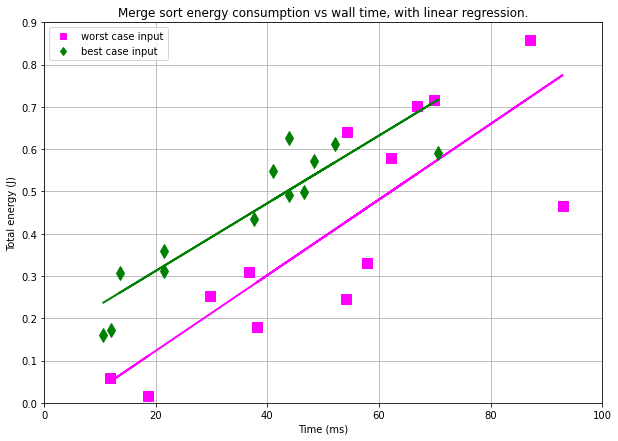

In [104]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

# for i in range(1,11):
#     Rs.append(polyReg(dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["Time - readCSV"], dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["full EC"],1, f"Random{i} case input", "darkorange",dots="v"))
# plt.plot(0,0,"v", color="darkorange",label="random1 - random10")
# for i in range(len(Rs)):
#     print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["Time - readCSV"], dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s")
plt.plot(-100,0,"s", color="fuchsia",label="worst case input")
print(f"worst R2 ", worst[1], "\n")
best = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "best"]["Time - readCSV"], dfMergeMean16[dfMergeMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d")
plt.plot(-100,0,"d", color="green",label="best case input")
print(f"best R2 ", best[1], "\n")
plt.title("Merge sort energy consumption vs wall time, with linear regression.")
plt.ylabel("Total energy (J)")
plt.xlabel("Time (ms)")
plt.xlim(0, 100)
plt.ylim(0, 0.9)
plt.legend()
plt.grid()
plt.show()


# EC v big-oh

random0 R2 0.7248512925699142  

random1 R2 0.7333914003721211  

random2 R2 0.8734792477220192  

random3 R2 0.752284887401671  

random4 R2 0.7081359137460219  

random5 R2 0.883632802396927  

random6 R2 0.7253735534601977  

random7 R2 0.768126508111273  

random8 R2 0.8055160592102497  

random9 R2 0.7609264989537248  

worst R2  0.12659201713270707 

best R2  0.07075202945487358 



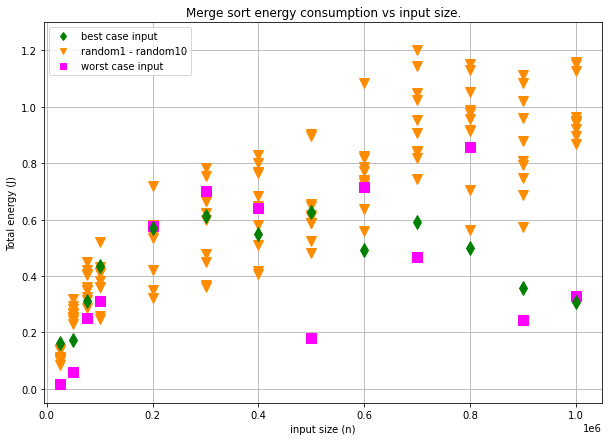

In [79]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

plt.plot(-10000,-10000,"d", color="green",label="best case input")
for i in range(1,11):
    Rs.append(polyReg(dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["Size"], dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v",regLine=False))
plt.plot(-10000,-10000,"v", color="darkorange",label="random1 - random10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["Size"], dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
best = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "best"]["Size"], dfMergeMean16[dfMergeMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=False)
plt.plot(-10000,-10000,"s", color="fuchsia",label="worst case input")
print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Merge sort energy consumption vs input size.")
plt.xlabel("input size (n)")
plt.ylabel("Total energy (J)")
plt.grid()
plt.xlim(-5000,1050000)
plt.ylim(-0.05,1.3)
plt.legend()
plt.show()

random0 R2 0.7184667258309425  

random1 R2 0.7235575417419038  

random2 R2 0.8687632823196478  

random3 R2 0.7416622004974949  

random4 R2 0.6935072235721165  

random5 R2 0.8784986135682565  

random6 R2 0.7143342552385938  

random7 R2 0.7617334362350068  

random8 R2 0.8003210896340952  

random9 R2 0.7496575917869124  

worst R2  0.11627920541435222 

best R2  0.059774990451881505 



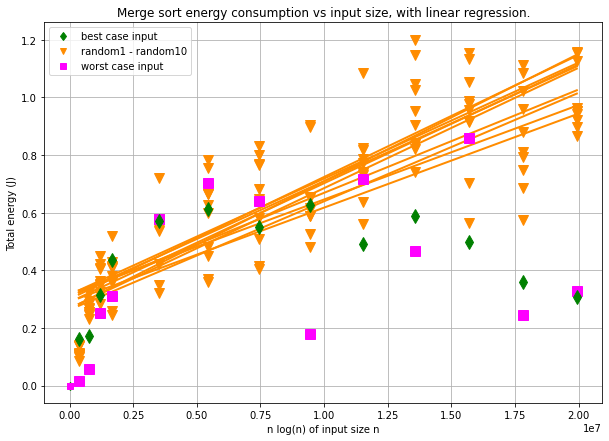

In [80]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

plt.plot(-0000,-0000,"d", color="green",label="best case input")
for i in range(1,11):
    Rs.append(polyReg(dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["nlog(n)"], dfMergeMean16[dfMergeMean16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "darkorange",dots="v"))
plt.plot(-0000,-0000,"v", color="darkorange",label="random1 - random10")
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
worst = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["nlog(n)"], dfMergeMean16[dfMergeMean16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "fuchsia",dots="s",regLine=False)
best = polyReg(dfMergeMean16[dfMergeMean16["Input case"] == "best"]["nlog(n)"], dfMergeMean16[dfMergeMean16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green",dots="d",regLine=False)
plt.plot(-0000,-0000,"s", color="fuchsia",label="worst case input")
print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Merge sort energy consumption vs input size, with linear regression.")
plt.xlabel("n log(n) of input size n")
plt.ylabel("Total energy (J)")
plt.grid()
plt.legend()
plt.show()